In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
#import google
from PIL import Image
import os 
import time
import argparse
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from skimage import transform#
from skimage import io
from skimage import exposure
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks



In [69]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() #+ '/GTSRB'
for i in range(classes): 
  path = os. path.join(cur_path,'Train', str(i)) #train
  images = os.listdir(path) 
  for a in images: 
   try: 
     image = Image.open(path + '/'+ a) 
     image = image.resize((30,30)) 
     image = np.array(image) 
     data.append(image) 
     labels.append(i) 
   except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)



In [70]:
#verify printing data
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [71]:
#Building the model ORIGINAL 0
model = Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) #despues de relu, , input_shape=X_train.shape[1:])
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5)) 
model.add(Dense(43, activation='softmax')) 
#Compilation of the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Accuracy : 96.36%

In [72]:
epochs = 15
history = model.fit(X_train,y_train,batch_size=64,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/15
491/491 [==============================] - 14s 28ms/step - loss: 2.2192 - accuracy: 0.4616 - val_loss: 0.5597 - val_accuracy: 0.8695
Epoch 2/15
491/491 [==============================] - 13s 26ms/step - loss: 0.6267 - accuracy: 0.8201 - val_loss: 0.1917 - val_accuracy: 0.9537
Epoch 3/15
491/491 [==============================] - 14s 28ms/step - loss: 0.3399 - accuracy: 0.9044 - val_loss: 0.1138 - val_accuracy: 0.9731
Epoch 4/15
491/491 [==============================] - 13s 27ms/step - loss: 0.2559 - accuracy: 0.9276 - val_loss: 0.0883 - val_accuracy: 0.9827
Epoch 5/15
491/491 [==============================] - 13s 26ms/step - loss: 0.1932 - accuracy: 0.9467 - val_loss: 0.0791 - val_accuracy: 0.9801
Epoch 6/15
491/491 [==============================] - 13s 26ms/step - loss: 0.1871 - accuracy: 0.9487 - val_loss: 0.0454 - val_accuracy: 0.9892
Epoch 7/15
491/491 [==============================] - 13s 26ms/step - loss: 0.1522 - accuracy: 0.9584 - val_loss: 0.0495 - val_accuracy:

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

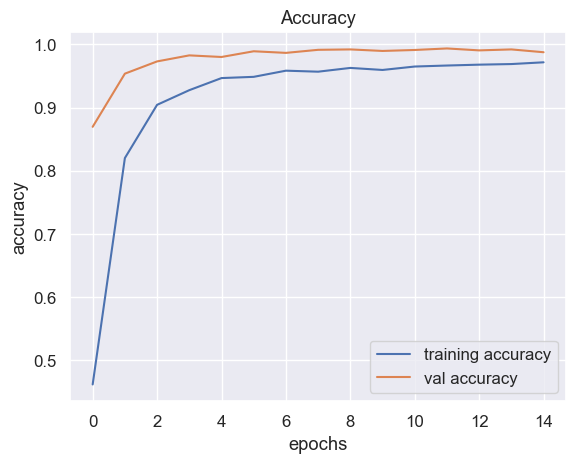

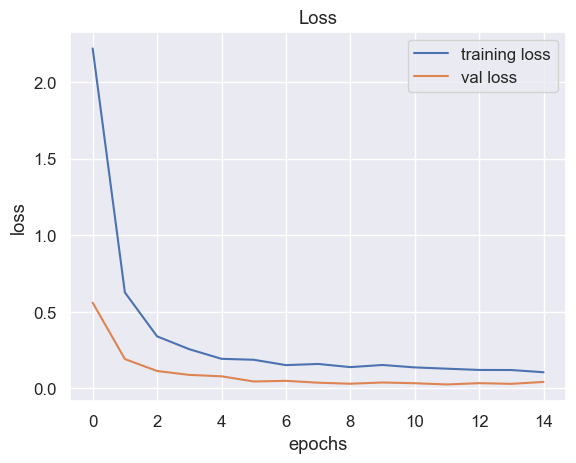

In [74]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()#optional?

In [75]:
#model = load_model('traffic_classifier_model.h5')

In [76]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict_classes(X_test)
pred_proba = model.predict(X_test)
pred = np.argmax(pred_proba, axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,pred))
model.save('traffic_classifier_model.h5')#96.23%

395/395 [==============================] - 2s 4ms/step
0.9581947743467933


In [77]:
# Calcula precisión, recall, f1-score y soporte
classification_report_str = classification_report(labels, pred)

# Imprime el informe de clasificación
print(classification_report_str)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.95      0.99      0.97       720
           2       1.00      0.98      0.99       750
           3       0.96      0.93      0.95       450
           4       0.99      0.97      0.98       660
           5       0.92      0.98      0.95       630
           6       1.00      0.85      0.92       150
           7       0.97      0.96      0.97       450
           8       0.95      0.97      0.96       450
           9       0.97      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.93      0.91      0.92       420
          12       0.96      0.98      0.97       690
          13       1.00      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.92      1.00      0.96       210
          16       0.99      1.00      1.00       150
          17       0.99    

## Test and Check results

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder


In [79]:
# Example data, model prediction, and true labels (You need to replace these with your actual model and data)
# Assume X_test, y_test, and model are predefined as per your setup
model = load_model('traffic_classifier_model.h5')
y_predicted = model.predict(X_test)

# Convert y_test to a NumPy array (assuming single label per image)
y_test = pd.read_csv('Test.csv')["ClassId"].values  # Assuming "ClassId" is the label column

# Check the shape of y_test to confirm it's 1D (single label per image)
print(f"Shape of y_test: {y_test.shape}")  # This line helps with debugging

y_test_np = y_test  # No need for argmax as y_test should already be numerical labels

y_predicted_np = np.argmax(y_predicted, axis=1).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test_np, y_predicted_np)

unique_classes = np.unique(y_test_np)  # Get unique class labels from y_test_np
class_names = [str(c) for c in unique_classes]  # Convert labels to strings

report = classification_report(y_test_np, y_predicted_np, target_names=class_names)


print("Classification Report:")
print(report)

# Print the overall accuracy
print("Overall Accuracy:", accuracy)

395/395 [==============================] - 2s 5ms/step
Shape of y_test: (12630,)
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.95      0.99      0.97       720
           2       1.00      0.98      0.99       750
           3       0.96      0.93      0.95       450
           4       0.99      0.97      0.98       660
           5       0.92      0.98      0.95       630
           6       1.00      0.85      0.92       150
           7       0.97      0.96      0.97       450
           8       0.95      0.97      0.96       450
           9       0.97      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.93      0.91      0.92       420
          12       0.96      0.98      0.97       690
          13       1.00      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.92      1.

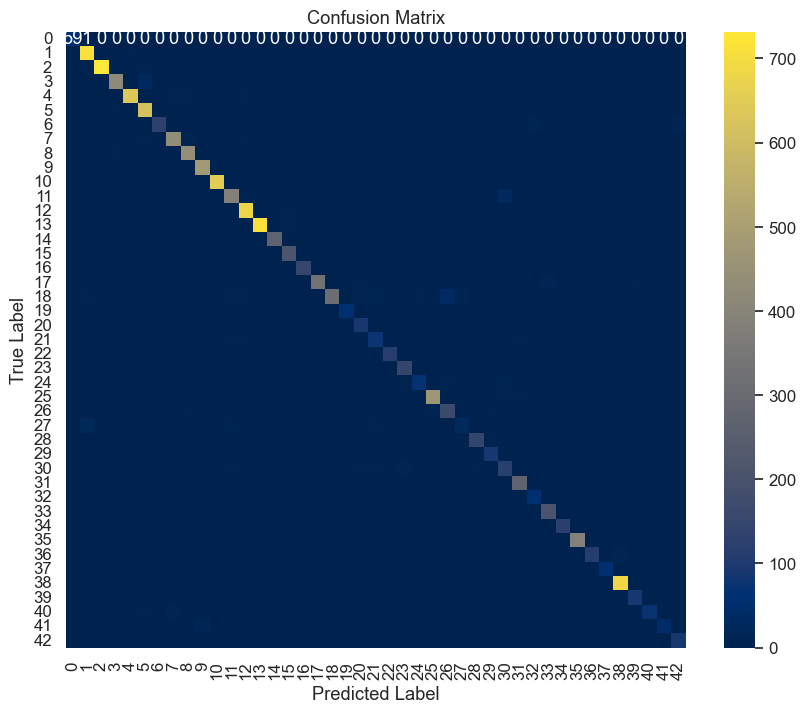

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
# Assuming y_test_np is your true labels and y_predicted_np is your predictions
# Ensure both are correctly calculated and shaped
labels = y_test_np  # True labels
pred = y_predicted_np  # Model predictions
 
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels, pred, labels=np.arange(43))  # Explicitly setting the labels
 
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cividis", xticklabels=range(43), yticklabels=range(43))
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(43), yticklabels=range(43))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

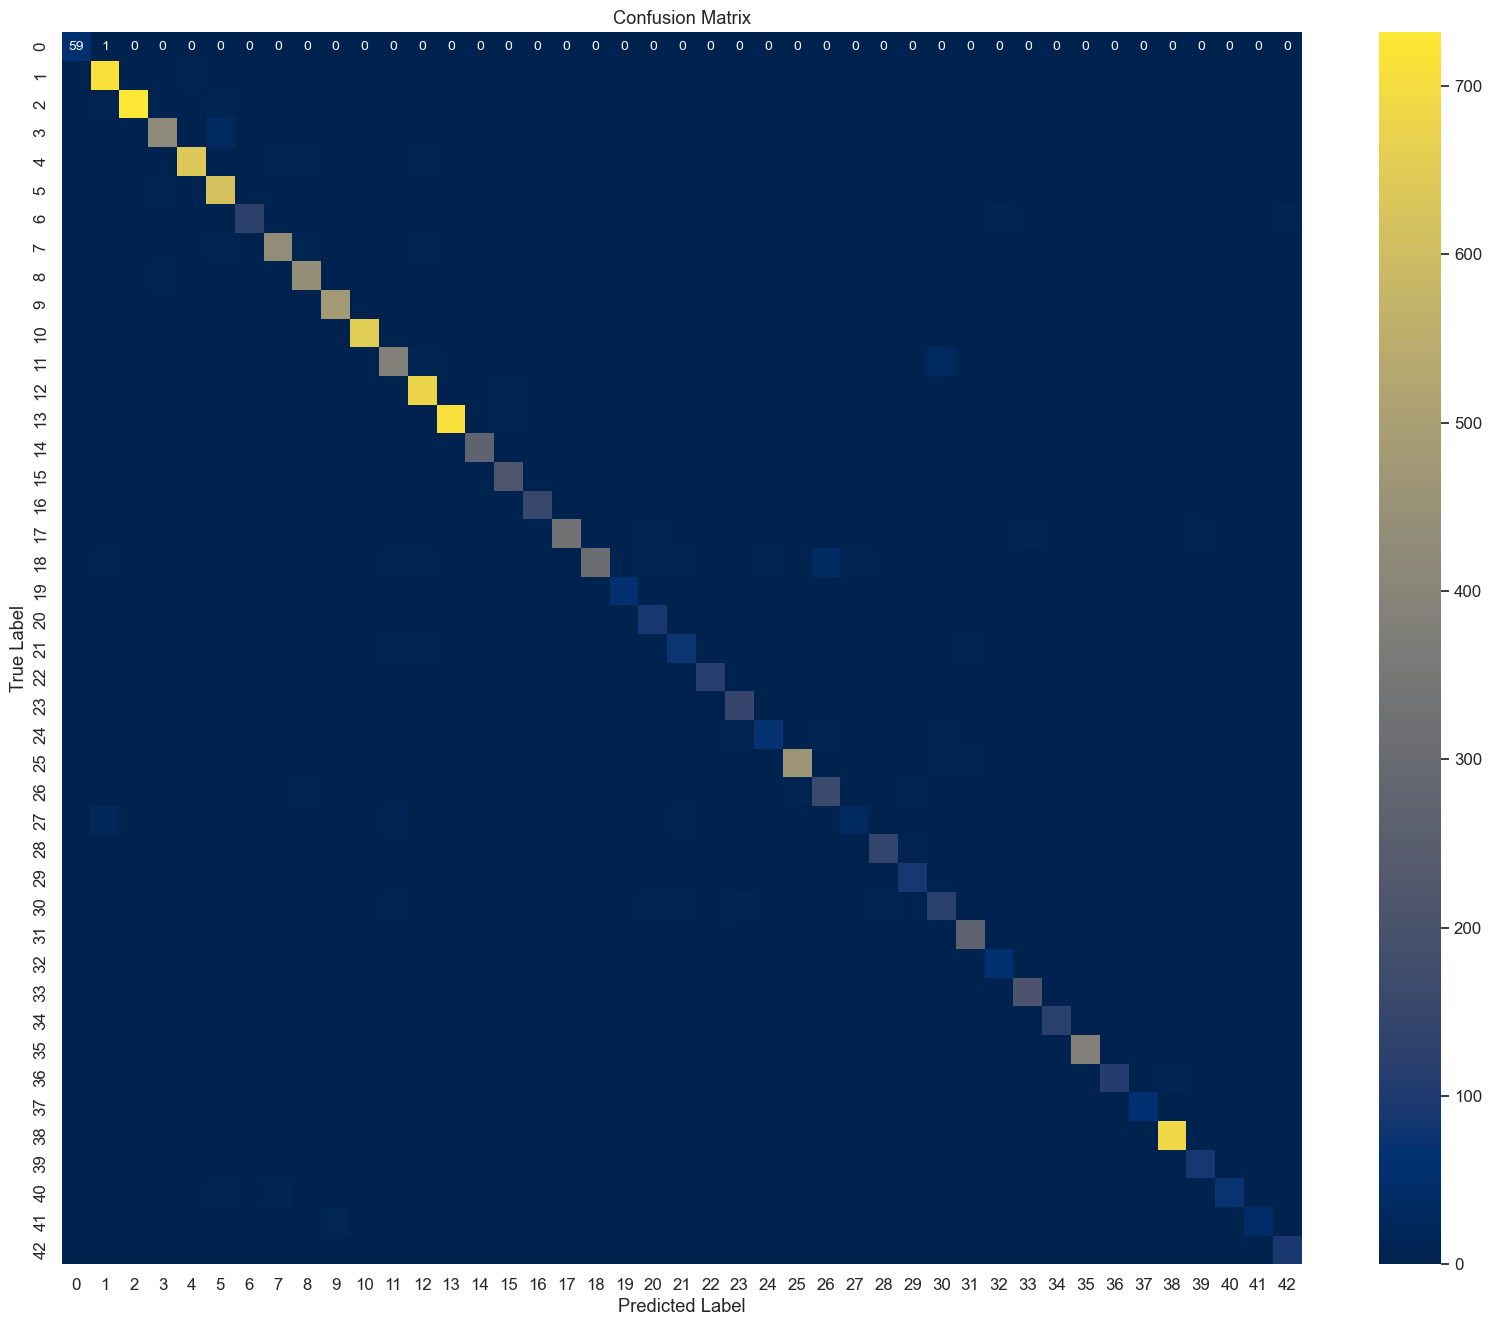

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
# Assuming y_test_np is your true labels and y_predicted_np is your predictions
# Ensure both are correctly calculated and shaped
labels = y_test_np  # True labels
pred = y_predicted_np  # Model predictions
 
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels, pred, labels=np.arange(43))  # Explicitly setting the labels
 
# Increase the default figure size and adjust font size for better visibility
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.set(font_scale=1.1)  # Adjust to scale up or down the font size
 
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cividis", xticklabels=range(43), yticklabels=range(43),#Blues
            annot_kws={"size": 10, "color": "white"})  # black
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [82]:
import numpy as np
 
# Assume 'conf_matrix' is the confusion matrix you've computed
print("Raw confusion matrix:")
print(conf_matrix)
 
# Find misclassifications: Elements off the diagonal
misclassified_indices = np.where(~np.eye(conf_matrix.shape[0],dtype=bool))
misclassified_values = conf_matrix[misclassified_indices]
 
# Count total misclassifications
total_misclassifications = np.sum(misclassified_values)
print(f"Total number of misclassifications: {total_misclassifications}")
 
# Count misclassifications for each class
misclassifications_per_class = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
print(f"Misclassifications for each class: {misclassifications_per_class}")
 
# To inspect specific misclassifications
# (assuming 'labels' is the true labels and 'pred' is the predicted labels)
for i, (true_label, predicted_label) in enumerate(zip(labels, pred)):
    if true_label != predicted_label:
        print(f"Index: {i}, True Label: {true_label}, Predicted Label: {predicted_label}")

Raw confusion matrix:
[[ 59   1   0 ...   0   0   0]
 [  1 711   1 ...   1   0   0]
 [  0   5 732 ...   0   0   0]
 ...
 [  0   0   0 ...  74   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  90]]
Total number of misclassifications: 528
Misclassifications for each class: [ 1  9 18 32 18 11 22 18 12  0  6 36 12  9  0  1  0 30 84  0  0 13  5  3
 21 12 18 33  8  2 32  4  0  3  1  3 11  0  4  4 16 16  0]
Index: 50, True Label: 25, Predicted Label: 31
Index: 69, True Label: 28, Predicted Label: 29
Index: 137, True Label: 40, Predicted Label: 7
Index: 163, True Label: 25, Predicted Label: 21
Index: 164, True Label: 18, Predicted Label: 26
Index: 176, True Label: 3, Predicted Label: 5
Index: 198, True Label: 18, Predicted Label: 1
Index: 269, True Label: 18, Predicted Label: 26
Index: 314, True Label: 1, Predicted Label: 40
Index: 331, True Label: 18, Predicted Label: 26
Index: 339, True Label: 22, Predicted Label: 38
Index: 355, True Label: 40, Predicted Label: 7
Index: 393,

### Model 2

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/20
491/491 [==============================] - 4s 7ms/step - loss: 1.3888 - accuracy: 0.7203 - val_loss: 0.4233 - val_accuracy: 0.8977
Epoch 2/20
491/491 [==============================] - 3s 7ms/step - loss: 0.3010 - accuracy: 0.9217 - val_loss: 0.2567 - val_accuracy: 0.9387
Epoch 3/20
491/491 [==============================] - 4s 7ms/step - loss: 0.2158 - accuracy: 0.9458 - val_loss: 0.2736 - val_accuracy: 0.9325
Epoch 4/20
491/491 [==============================] - 4s 7ms/step - loss: 0.1817 - accuracy: 0.9531 - val_loss: 0.2770 - val_accuracy: 0.9401
Epoch 5/20
491/491 [==============================] - 4s 7ms/step - loss: 0.1580 - accuracy: 0.9611 - val_loss: 0.2000 - val_accuracy: 0.9584
Epoch 6/20
491/491 [==============================] - 4s 7ms/step - loss: 0.1410 - accuracy: 0.9642 - val_loss: 0.2768 - val_accuracy: 0.9454
Epoch 7/20
491/491 [==============================] - 3s 7ms/step 

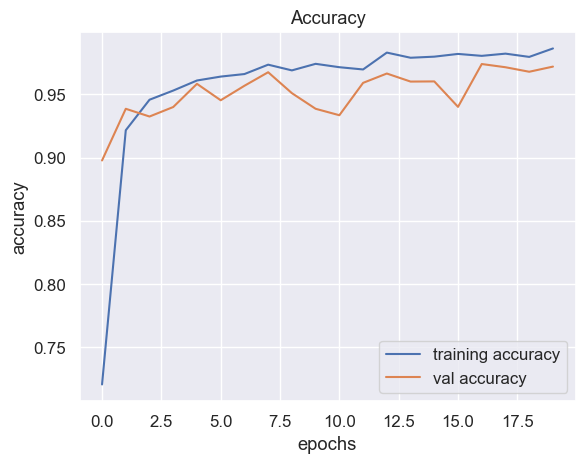

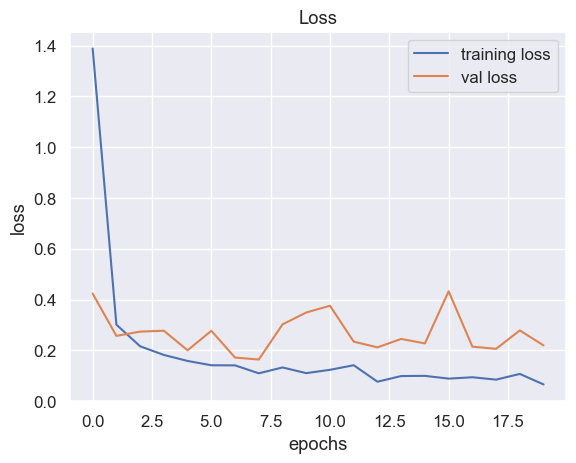

395/395 [==============================] - 1s 2ms/step
0.9043547110055423


In [83]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() #+ '/GTSRB'
for i in range(classes): 
  path = os. path.join(cur_path,'Train', str(i)) #train
  images = os.listdir(path) 
  for a in images: 
   try: 
     image = Image.open(path + '/'+ a) 
     image = image.resize((30,30)) 
     image = np.array(image) 
     data.append(image) 
     labels.append(i) 
   except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)
#verify printing data
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
#Building model v1

model_v1 = Sequential()
model_v1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))  # Corrected line

model_v1.add(MaxPool2D(pool_size=(3,3)))
# flatten output of conv
model_v1.add(Flatten())
# hidden layer
model_v1.add(Dense(200, activation='relu'))
model_v1.add(Dense(200, activation='relu'))

model_v1.add(Dense(43, activation='softmax')) 
#Compilation of the model 
model_v1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history_v1 = model_v1.fit(X_train,y_train,batch_size=64,epochs=epochs,validation_data=(X_test,y_test))

#plotting graphs for accuracy
plt.figure(0)
plt.plot(history_v1.history['accuracy'], label='training accuracy')
plt.plot(history_v1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history_v1.history['loss'], label='training loss')
plt.plot(history_v1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict_classes(X_test)
pred_proba = model_v1.predict(X_test)
pred = np.argmax(pred_proba, axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,pred))
model_v1.save('traffic_classifier_model_v1.h5')#83.51%


In [84]:
# Calcula precisión, recall, f1-score y soporte
classification_report_str = classification_report(labels, pred)

# Imprime el informe de clasificación
print(classification_report_str)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        60
           1       0.95      0.94      0.94       720
           2       0.79      0.95      0.86       750
           3       0.84      0.84      0.84       450
           4       0.97      0.93      0.95       660
           5       0.91      0.81      0.86       630
           6       0.87      0.78      0.82       150
           7       0.89      0.90      0.89       450
           8       0.85      0.87      0.86       450
           9       0.95      0.93      0.94       480
          10       0.97      0.94      0.96       660
          11       0.87      0.80      0.83       420
          12       0.98      0.95      0.96       690
          13       0.99      0.99      0.99       720
          14       0.91      0.99      0.95       270
          15       0.81      0.98      0.89       210
          16       0.99      0.99      0.99       150
          17       0.94    

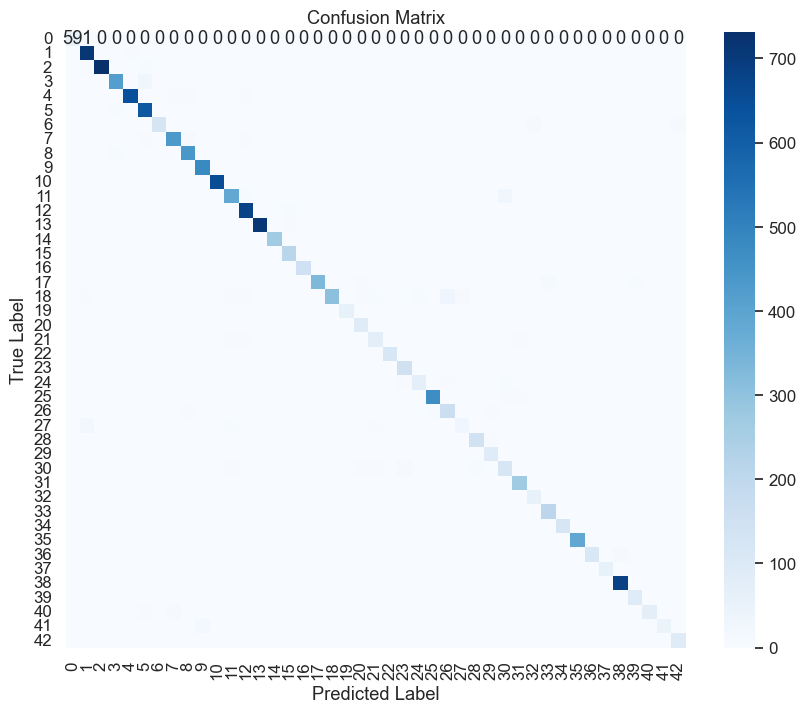

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
# Assuming y_test_np is your true labels and y_predicted_np is your predictions
# Ensure both are correctly calculated and shaped
labels = y_test_np  # True labels
pred = y_predicted_np  # Model predictions
 
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels, pred, labels=np.arange(43))  # Explicitly setting the labels
 
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(43), yticklabels=range(43))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [86]:
import numpy as np
 
# Assume 'conf_matrix' is the confusion matrix you've computed
print("Raw confusion matrix:")
print(conf_matrix)
 
# Find misclassifications: Elements off the diagonal
misclassified_indices = np.where(~np.eye(conf_matrix.shape[0],dtype=bool))
misclassified_values = conf_matrix[misclassified_indices]
 
# Count total misclassifications
total_misclassifications = np.sum(misclassified_values)
print(f"Total number of misclassifications: {total_misclassifications}")
 
# Count misclassifications for each class
misclassifications_per_class = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
print(f"Misclassifications for each class: {misclassifications_per_class}")
 
# To inspect specific misclassifications
# (assuming 'labels' is the true labels and 'pred' is the predicted labels)
for i, (true_label, predicted_label) in enumerate(zip(labels, pred)):
    if true_label != predicted_label:
        print(f"Index: {i}, True Label: {true_label}, Predicted Label: {predicted_label}")

Raw confusion matrix:
[[ 59   1   0 ...   0   0   0]
 [  1 711   1 ...   1   0   0]
 [  0   5 732 ...   0   0   0]
 ...
 [  0   0   0 ...  74   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  90]]
Total number of misclassifications: 528
Misclassifications for each class: [ 1  9 18 32 18 11 22 18 12  0  6 36 12  9  0  1  0 30 84  0  0 13  5  3
 21 12 18 33  8  2 32  4  0  3  1  3 11  0  4  4 16 16  0]
Index: 50, True Label: 25, Predicted Label: 31
Index: 69, True Label: 28, Predicted Label: 29
Index: 137, True Label: 40, Predicted Label: 7
Index: 163, True Label: 25, Predicted Label: 21
Index: 164, True Label: 18, Predicted Label: 26
Index: 176, True Label: 3, Predicted Label: 5
Index: 198, True Label: 18, Predicted Label: 1
Index: 269, True Label: 18, Predicted Label: 26
Index: 314, True Label: 1, Predicted Label: 40
Index: 331, True Label: 18, Predicted Label: 26
Index: 339, True Label: 22, Predicted Label: 38
Index: 355, True Label: 40, Predicted Label: 7
Index: 393,

## TRAFFIC SIGNS CLASSIFIER GUI

In [87]:
"""
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier_model.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    #pred = model.predict_classes([image])[0]
    pred_proba = model.predict([image])[0]
    pred = np.argmax(pred_proba)
    ####
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()
"""

'\nimport tkinter as tk\nfrom tkinter import filedialog\nfrom tkinter import *\nfrom PIL import ImageTk, Image\nimport numpy as np\n#load the trained model to classify sign\nfrom keras.models import load_model\nmodel = load_model(\'traffic_classifier_model.h5\')\n#dictionary to label all traffic signs class.\nclasses = { 1:\'Speed limit (20km/h)\',\n            2:\'Speed limit (30km/h)\', \n            3:\'Speed limit (50km/h)\', \n            4:\'Speed limit (60km/h)\', \n            5:\'Speed limit (70km/h)\', \n            6:\'Speed limit (80km/h)\', \n            7:\'End of speed limit (80km/h)\', \n            8:\'Speed limit (100km/h)\', \n            9:\'Speed limit (120km/h)\', \n            10:\'No passing\', \n            11:\'No passing veh over 3.5 tons\', \n            12:\'Right-of-way at intersection\', \n            13:\'Priority road\', \n            14:\'Yield\', \n            15:\'Stop\', \n            16:\'No vehicles\', \n            17:\'Veh > 3.5 tons prohibited\

## NOTES
Make the detection using csv for train and test, maybe using google maps
https://www.youtube.com/watch?v=2b7nwPeIj40
train.csv
test.csv
class.csv


### Another Traffic Signs recognitions and Localizations
https://github.com/zahid58/Traffic-Sign-Localization-and-Recognition
https://github.com/aarcosg/traffic-sign-detection/tree/master

### Darkflow
https://github.com/thtrieu/darkflow

### REFERENCES
1. https://data-flair.training/blogs/python-project-traffic-signs-recognition/
2. https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d
3. https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d
5. https://www.analyticsvidhya.com/blog/2021/12/traffic-signs-recognition-using-cnn-and-keras-in-python/#commentModule
6. https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/